In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

In [2]:
from IPython.core.pylabtools import figsize
figsize(20, 8)

# change sns back to matplotlib
# sns.reset_orig()

# LATEX BACKEND
# plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=25)
# matplotlib.rcParams['lines.linewidth'] = lw

plt.rcParams.update({'font.size': 22})

In [3]:
!tree -d SherpaResults/land_data_random*

SherpaResults/land_data_random
└── normal_mse
    ├── Models
    └── output
        ├── jobs
        ├── journal
        └── _tmp
SherpaResults/land_data_random2
└── normal_mse
    ├── Models
    └── output
        ├── jobs
        ├── journal
        └── _tmp
SherpaResults/land_data_random3
└── normal_mse
    ├── Models
    └── output
        ├── jobs
        ├── journal
        └── _tmp
SherpaResults/land_data_random4
└── normal_mse
    ├── Models
    └── output
        ├── jobs
        ├── journal
        └── _tmp

24 directories


In [4]:
!tree SherpaResults/baselines/land_data

SherpaResults/baselines/land_data
└── normal_mse
    └── Models
        ├── 00001.h5
        └── 00001.json

2 directories, 2 files


In [5]:
!ls -lta SherpaResults/baselines/land_data/normal_mse/Models

total 976
drwx------ 3 jott1 baldig   4096 Nov  6 07:38 .
-rw------- 1 jott1 baldig   1151 Oct 24 14:16 00001.json
drwx------ 2 jott1 baldig   4096 Oct 24 14:08 .ipynb_checkpoints
-rw------- 1 jott1 baldig 977524 Oct 23 11:52 00001.h5
drwx------ 3 jott1 baldig   4096 Oct 22 10:51 ..


# Initial Run
---

**Original hp ranges**  
parameters = [
    sherpa.Continuous('dropout', [0., 0.25]),
    # sherpa.Continuous('lr', [0.00001, 0.01], 'log'),
    sherpa.Choice('lr', [0.001]),
    sherpa.Continuous('leaky_relu', [0., 0.4]),
    sherpa.Ordinal('batch_norm', [1, 0]),
    sherpa.Discrete('num_layers', [3,FLAGS.max_dense_layers]),
    # sherpa.Continuous('lr_decay', [0.5, 1.]),
    sherpa.Choice('lr_decay', [1.]),

    # sherpa.Continuous('momentum', [0.5, 0.99]),
    sherpa.Choice('optimizer', ['adam', 'sgd', 'rmsprop']),

    sherpa.Choice('num_dense_nodes', [128, 256, 512])
]

In [6]:
def get_results(version=''):
    result_dir = 'SherpaResults/land_data_random{}/normal_mse/'.format(version)

    history_dir = result_dir + 'Models/'
    result_file = result_dir + 'output/results.csv'

    df = pd.read_csv(result_file)

    df = df[df['Status'] != 'COMPLETED'].reset_index()

    # not necessary to read JSON 
    # for trial_id in df['Trial-ID'].unique():
    #     json_file = history_dir + '%05d.json' % trial_id

    #     # check if file exists
    #     if not os.path.isfile(json_file): continue

    #     with open(json_file, 'r') as history_file:
    #         history = eval(history_file.read())

    #     df.loc[df['Trial-ID'] == trial_id, 'loss'] = history['loss']
    #     df.loc[df['Trial-ID'] == trial_id, 'val_loss'] = history['val_loss']

    bad_trials = df[(df['val_loss'] > 0.005) | (df['loss'] > 0.005)]['Trial-ID'].unique()
    df = df[~df['Trial-ID'].isin(bad_trials)].reset_index()
    return df

def combine_dfs(first='',second='2'):
    df1 = get_results(first)
    df2 = get_results(second)
    
    if df1['val_loss'].min() > df2['val_loss'].min():
        print 'Best loss:', df2['val_loss'].min(),'from run 2, trial:', df2.iloc[df2['val_loss'].idxmin()]['Trial-ID']
    else:
        print 'Best loss:', df1['val_loss'].min(),'from run 1, trial:', df1.iloc[df1['val_loss'].idxmin()]['Trial-ID']
        
    df2['Trial-ID'] = df1['Trial-ID'].max() + df2['Trial-ID']
    
    print df2['Trial-ID'].max(), 'models tried...'
    df = df1.append(df2, ignore_index=True)

    return df

baseline = {'val_loss': [0.0027699412128464975, 0.0027675854094271883, 0.002750806139965779, 0.0027184670896490343, 0.002697938473128253, 0.0027200228956737404, 0.002697579861752714, 0.0027041057355993194, 0.0027361180229907287, 0.0027223027184516144, 0.0027174908288899085, 0.002705075166346688, 0.0026945003744093007, 0.002688072946386839, 0.002714479107119437, 0.0027216500134899803, 0.002692673348817968, 0.0027151860584786465, 0.002717053027243123, 0.002696788561289504, 0.0027047853027976796, 0.0027102316666424995, 0.002679989631039186, 0.002674067506729597, 0.0026703028731369], 'loss': [0.0029240883347595847, 0.0027942983982693985, 0.002765629174030718, 0.0027506531794350467, 0.00273707072116032, 0.002728933417163408, 0.0027222536753665214, 0.0027198918636816075, 0.0027193166255475736, 0.0027167066369639882, 0.0027142092041242604, 0.0027110217051854353, 0.0027093022819072265, 0.002706057847611977, 0.0027044928225834425, 0.0027045464933883557, 0.002703787513724742, 0.0027013152791427967, 0.002699959184807386, 0.0026990613309396693, 0.0026981373776758678, 0.0026971993964014012, 0.002695570826957943, 0.002693741966372858, 0.0026922912526016704], 'Iteration':range(25)}

baseline = pd.DataFrame(baseline)

In [7]:
df = combine_dfs()

Best loss: 0.002393034852266267 from run 2, trial: 22
218 models tried...


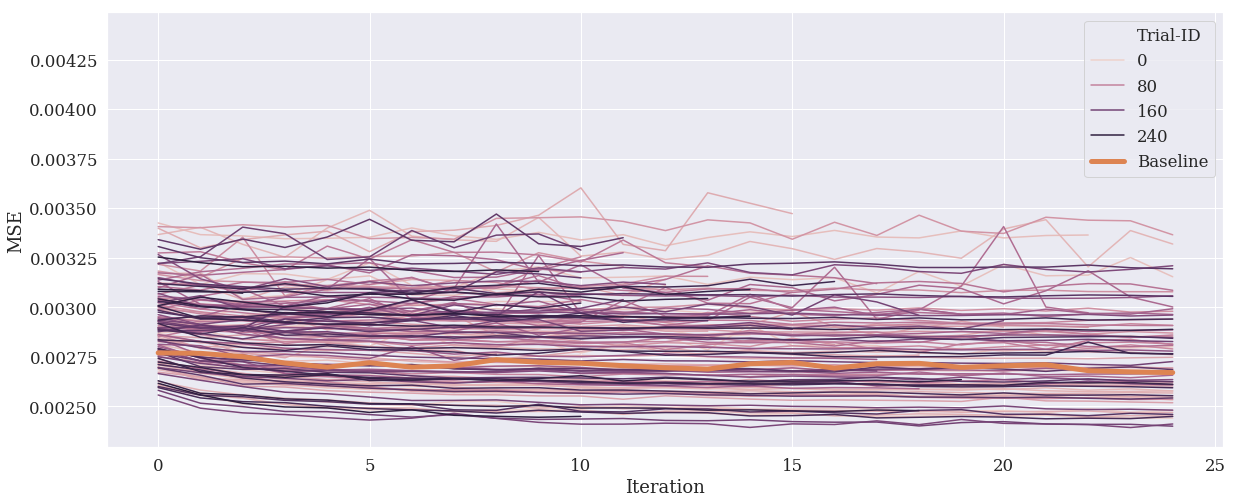

In [8]:
# sns.lineplot(x='Iteration', y='loss', data=df, label='Loss')
sns.lineplot(x='Iteration', y='val_loss', data=df, hue='Trial-ID') # label='Val Loss',
sns.lineplot(x='Iteration', y='val_loss', data=baseline, label='Baseline', lw=5)
plt.ylabel('MSE'); plt.legend(); plt.show()

In [9]:
best_trial = df.iloc[df['val_loss'].idxmin()]['Trial-ID']
best_df = df[df['Trial-ID'] == best_trial]

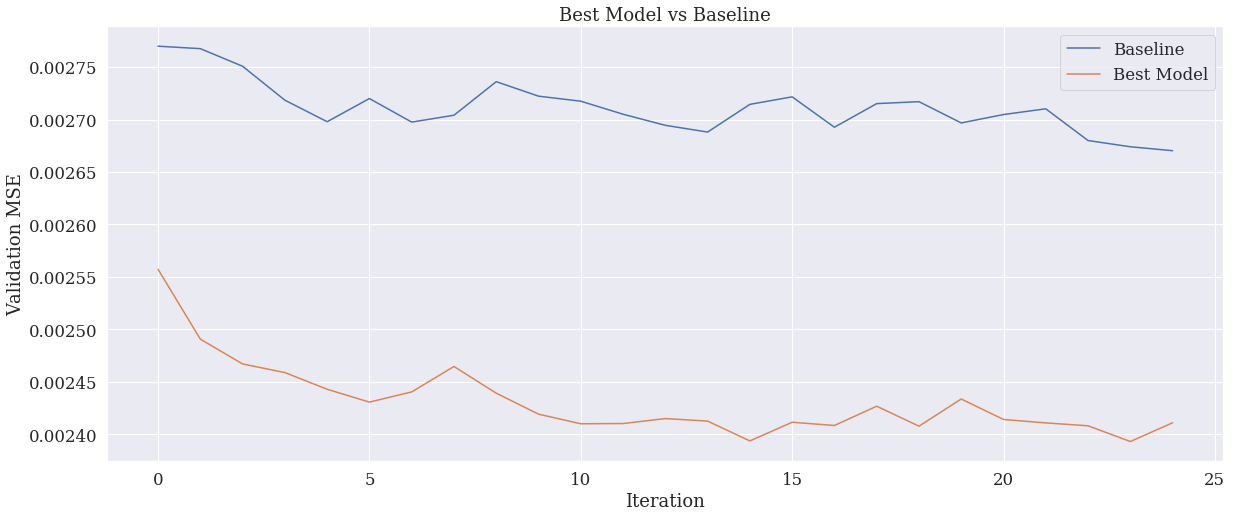

In [10]:
sns.lineplot(x='Iteration', y='val_loss', data=baseline, label='Baseline')
sns.lineplot(x='Iteration', y='val_loss', data=best_df, label='Best Model')
plt.ylabel('Validation MSE'); plt.title('Best Model vs Baseline'); plt.legend(); plt.show()

# Best Settings from Initial Run

In [11]:
for col in ['Trial-ID', 'batch_norm', 'dropout', 'leaky_relu', 'lr', 'num_dense_nodes', 'num_layers', 'optimizer', 'val_loss']:
    print col, ':', best_df[col].min()

Trial-ID : 153
batch_norm : 1
dropout : 0.00859183111204348
leaky_relu : 0.12525948014239038
lr : 0.001
num_dense_nodes : 512
num_layers : 7
optimizer : adam
val_loss : 0.002393034852266267


# Secondary Run
---

parameters = [  
    sherpa.Choice('dropout', np.linspace(0,0.01, 10).tolist()),  
    sherpa.Choice('leaky_relu', np.linspace(0.1,0.15, 10).tolist()),  

    sherpa.Continuous('lr', [0.00001, 0.01], 'log'),
    sherpa.Continuous('lr_decay', [0.5, 1.]),

    sherpa.Choice('batch_norm', [1]),
    sherpa.Choice('num_layers', [7]),
    sherpa.Choice('optimizer', ['adam']),
    sherpa.Choice('num_dense_nodes', [512])
]

In [12]:
second_df = combine_dfs('3','4')

Best loss: 0.00232526399379592 from run 2, trial: 4
46 models tried...


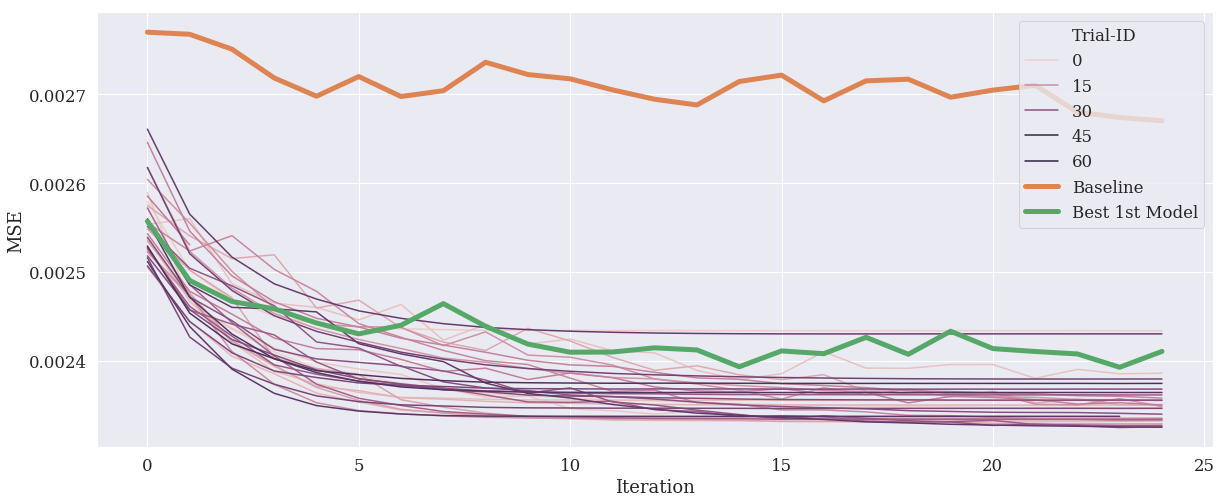

In [13]:
# sns.lineplot(x='Iteration', y='loss', data=df, label='Loss')
sns.lineplot(x='Iteration', y='val_loss', data=second_df, hue='Trial-ID') # label='Val Loss',
sns.lineplot(x='Iteration', y='val_loss', data=baseline, label='Baseline', lw=5)
sns.lineplot(x='Iteration', y='val_loss', data=best_df, label='Best 1st Model', lw=5)
plt.ylabel('MSE'); plt.legend(); plt.show()

In [14]:
best_second_trial = second_df.iloc[second_df['val_loss'].idxmin()]['Trial-ID']
best_second_df = second_df[second_df['Trial-ID'] == best_second_trial]

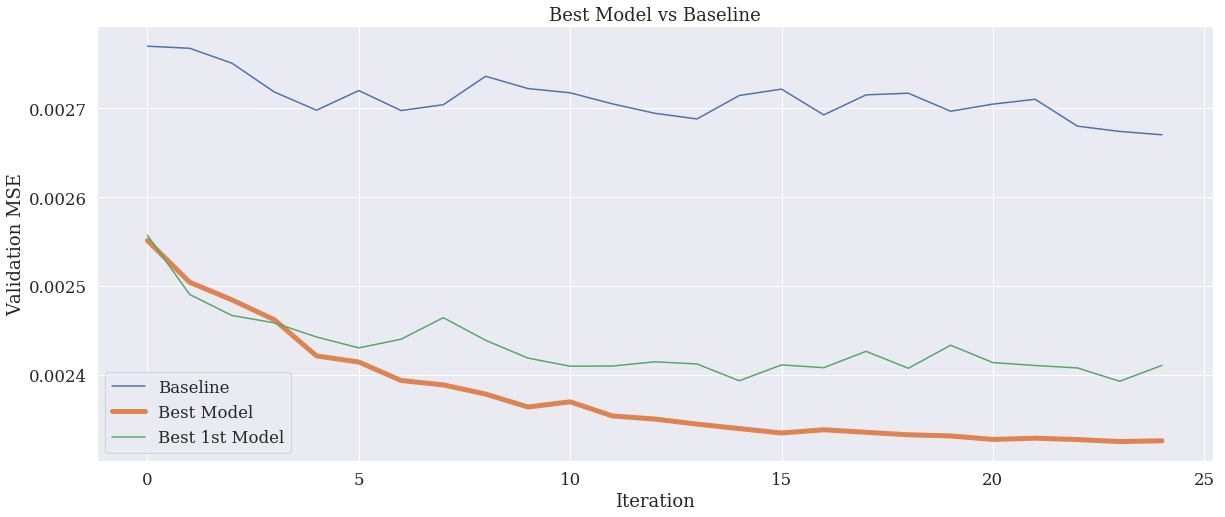

In [15]:
sns.lineplot(x='Iteration', y='val_loss', data=baseline, label='Baseline')
sns.lineplot(x='Iteration', y='val_loss', data=best_second_df, label='Best Model', lw=5)
sns.lineplot(x='Iteration', y='val_loss', data=best_df, label='Best 1st Model')
plt.ylabel('Validation MSE'); plt.title('Best Model vs Baseline'); plt.legend(); plt.show()

In [16]:
for col in ['Trial-ID', 'batch_norm', 'dropout', 'leaky_relu', 'lr', 'lr_decay', 'num_dense_nodes', 'num_layers', 'optimizer', 'val_loss']:
    print col, ':', best_second_df[col].min()

Trial-ID : 28
batch_norm : 1
dropout : 0.006666666666666665
leaky_relu : 0.15
lr : 0.00022657760081479483
lr_decay : 0.9082287412421732
num_dense_nodes : 512
num_layers : 7
optimizer : adam
val_loss : 0.00232526399379592
